<a href="https://colab.research.google.com/github/BRV12G/Final_year_Project/blob/main/XGBoost_1stdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding
from tensorflow.keras.models import Model

# Parameters
latent_dim = 256  # Dimension of LSTM
num_tokens_input = X_train.shape[1]  # Number of input features
num_tokens_output = len(y_le.classes_)  # Number of unique nutritional advice labels

# Encoder
encoder_inputs = Input(shape=(num_tokens_input,))
encoder_lstm = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_inputs)
encoder_states = [state_h, state_c]

# Decoder
decoder_inputs = Input(shape=(None,))  # For the target sequence (nutritional advice tokens)
decoder_embedding = Embedding(num_tokens_output, latent_dim)(decoder_inputs)
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)
decoder_dense = Dense(num_tokens_output, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Seq2Seq Model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


ValueError: Input 0 of layer "lstm" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 15)

In [ ]:
import numpy as np
from tensorflow.keras.layers import Input, LSTM
from tensorflow.keras.models import Model

# Define parameters
latent_dim = 256
num_tokens_input = 15  # number of features

# Define the encoder input with the correct shape for LSTM (timesteps, features)
encoder_inputs = Input(shape=(1, num_tokens_input))  # Adjusting to have one timestep and 15 features
encoder_lstm = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_inputs)
encoder_states = [state_h, state_c]

# You can now proceed with the rest of your model setup
encoder_model = Model(encoder_inputs, encoder_states)
encoder_model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 1, 15)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ [(None, 256), (None, 256),  │         278,528 │
│                                      │ (None, 256)]                │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 278,528 (1.06 MB)

 Trainable params: 278,528 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load your dataset
# df = pd.read_csv('your_data.csv')

# Identify all categorical columns
categorical_columns = ['Gender', 'Occupation', 'Quality of Sleep',
                       'Physical Activity Level', 'Sleep Disorder',
                       'Health Status', 'BMI Category', 'Blood Pressure Category',
                       'Stress Level']

# Encode all categorical columns
label_encoders = {}
for column in categorical_columns:
    if df[column].dtype == 'object':  # Only encode columns that are still non-numeric
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

# Drop irrelevant columns for training
X = df.drop(columns=['Person ID', 'Nutritional Needs'])

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode the target (Nutritional Needs)
y = df['Nutritional Needs']
y_le = LabelEncoder()
y = y_le.fit_transform(y)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Now you can proceed with model training


Accuracy: 0.9960
Precision: 0.9962
Recall: 0.9960
F1 Score: 0.9960

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       1.00      1.00      1.00       261
           2       1.00      0.99      0.99        90
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        15
           5       1.00      0.86      0.92         7
           6       1.00      1.00      1.00       206
           7       1.00      1.00      1.00       188
           8       1.00      0.99      0.99        73
           9       0.89      0.89      0.89         9
          10       0.92      1.00      0.96        11
          11       0.50      1.00      0.67         1
          12       0.99      1.00      0.99        71
          13       1.00      1.00      1.00        73
          14       1.00      0.97      0.98        32
          15       1.00      1.00      1.00 

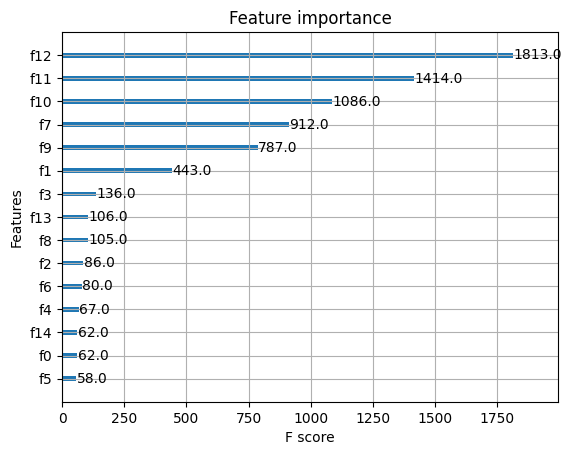

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print out the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Optional: print the full classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature importance plot (optional but useful)
import matplotlib.pyplot as plt

xgb.plot_importance(xgb_model)
plt.show()


In [ ]:
# Function to test the model with new data
def test_model(model, X_test, y_test):
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print out the evaluation metrics
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')

    # Optional: print the full classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Test the trained model on the test data
test_model(xgb_model, X_test, y_test)


Accuracy: 0.9960
Precision: 0.9962
Recall: 0.9960
F1 Score: 0.9960

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       1.00      1.00      1.00       261
           2       1.00      0.99      0.99        90
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        15
           5       1.00      0.86      0.92         7
           6       1.00      1.00      1.00       206
           7       1.00      1.00      1.00       188
           8       1.00      0.99      0.99        73
           9       0.89      0.89      0.89         9
          10       0.92      1.00      0.96        11
          11       0.50      1.00      0.67         1
          12       0.99      1.00      0.99        71
          13       1.00      1.00      1.00        73
          14       1.00      0.97      0.98        32
          15       1.00      1.00      1.00 

In [ ]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Function to safely encode unseen labels
def safe_label_encode(label_encoder, value):
    try:
        # Attempt to encode the value
        return label_encoder.transform([value])[0]
    except ValueError:
        # If the value is unseen, handle it (e.g., by assigning it a default value like -1)
        print(f"Warning: '{value}' is an unseen label, assigning default value.")
        return -1  # Assign a default value or handle it differently

# Function to preprocess user input data
def preprocess_input_data(user_input, label_encoders, scaler, feature_columns):
    # Convert user input into DataFrame (make sure the same columns as in the training set)
    user_input_df = pd.DataFrame([user_input])

    # Ensure that all columns are present, adding missing columns with default values (e.g., 0 or 'Unknown')
    for column in feature_columns:
        if column not in user_input_df.columns:
            if column in label_encoders:  # If the column is categorical, fill with a default category
                user_input_df[column] = ['Unknown']
            else:  # If the column is numerical, fill with a default value (e.g., 0)
                user_input_df[column] = [0]

    # Reorder columns to match the training order
    user_input_df = user_input_df[feature_columns]

    # Encode categorical columns using label encoders
    for column in label_encoders:
        if user_input_df[column].dtype == 'object':  # Apply encoding only to object columns
            user_input_df[column] = user_input_df[column].apply(lambda x: safe_label_encode(label_encoders[column], x))

    # Scale the numerical columns
    user_input_scaled = scaler.transform(user_input_df)

    return user_input_scaled

# Define the required columns (the features the model was trained on)
feature_columns = [
    'Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
    'Physical Activity Level', 'Stress Level', 'BMI Category',
    'Blood Pressure Category', 'Systolic', 'Diastolic', 'Heart Rate',
    'Daily Steps', 'Sleep Disorder', 'Health Status'
]

# Example of how to input unseen data:
user_input = {
    'Gender': 'Male',
    'Occupation': 'Engineer',
    'Quality of Sleep': 'Good',
    'Physical Activity Level': 'High',
    'Sleep Disorder': 'No',
    'Health Status': 'Healthy',
    'BMI Category': 'Normal',
    'Blood Pressure Category': 'Normal',
    'Stress Level': 'Low',
    'Age': 30,
    'Sleep Duration': 8,
    'Daily Steps': 10000,
    'Systolic': 120,
    'Diastolic': 80,
    'Heart Rate': 70
}

# Test the model with user input
predicted_nutritional_needs = predict_user_input(xgb_model, user_input, label_encoders, scaler, feature_columns)

# Print the prediction
print(f"Predicted Nutritional Needs: {predicted_nutritional_needs}")


Predicted Nutritional Needs: Low-sodium diet to manage blood pressure. | Maintain regular physical activity to keep heart rate stable. | Great activity level! Maintain a balanced diet to support activity.


In [ ]:
def get_user_input():
    # Prompt the user for input values
    user_input = {}

    # Input categorical values
    user_input['Gender'] = input("Enter Gender (Male/Female): ")
    user_input['Occupation'] = input("Enter Occupation (e.g., Engineer, Doctor, etc.): ")
    user_input['Quality of Sleep'] = input("Enter Quality of Sleep (Good/Fair/Poor): ")
    user_input['Physical Activity Level'] = input("Enter Physical Activity Level (Low/Medium/High): ")
    user_input['Sleep Disorder'] = input("Enter Sleep Disorder (Yes/No): ")
    user_input['Health Status'] = input("Enter Health Status (Healthy/Unhealthy): ")
    user_input['BMI Category'] = input("Enter BMI Category (Underweight/Normal/Overweight/Obese): ")
    user_input['Blood Pressure Category'] = input("Enter Blood Pressure Category (Low/Normal/High): ")
    user_input['Stress Level'] = input("Enter Stress Level (Low/Medium/High): ")

    # Input numerical values
    user_input['Age'] = int(input("Enter Age: "))
    user_input['Sleep Duration'] = float(input("Enter Sleep Duration (in hours): "))
    user_input['Daily Steps'] = int(input("Enter Daily Steps: "))
    user_input['Systolic'] = int(input("Enter Systolic Blood Pressure: "))
    user_input['Diastolic'] = int(input("Enter Diastolic Blood Pressure: "))
    user_input['Heart Rate'] = int(input("Enter Heart Rate: "))

    return user_input

# Function to preprocess user input data
def preprocess_input_data(user_input, label_encoders, scaler, feature_columns):
    # Convert user input into DataFrame (make sure the same columns as in the training set)
    user_input_df = pd.DataFrame([user_input])

    # Ensure that all columns are present, adding missing columns with default values (e.g., 0 or 'Unknown')
    for column in feature_columns:
        if column not in user_input_df.columns:
            if column in label_encoders:  # If the column is categorical, fill with a default category
                user_input_df[column] = ['Unknown']
            else:  # If the column is numerical, fill with a default value (e.g., 0)
                user_input_df[column] = [0]

    # Reorder columns to match the training order
    user_input_df = user_input_df[feature_columns]

    # Encode categorical columns using label encoders
    for column in label_encoders:
        if user_input_df[column].dtype == 'object':  # Apply encoding only to object columns
            user_input_df[column] = user_input_df[column].apply(lambda x: safe_label_encode(label_encoders[column], x))

    # Scale the numerical columns
    user_input_scaled = scaler.transform(user_input_df)

    return user_input_scaled

# Function to safely encode unseen labels
def safe_label_encode(label_encoder, value):
    try:
        return label_encoder.transform([value])[0]
    except ValueError:
        print(f"Warning: '{value}' is an unseen label, assigning default value.")
        return -1  # You can choose a different default value here

# Function to predict based on user input
def predict_user_input(model, user_input, label_encoders, scaler, feature_columns):
    # Preprocess the input data
    preprocessed_input = preprocess_input_data(user_input, label_encoders, scaler, feature_columns)

    # Make the prediction
    prediction = model.predict(preprocessed_input)

    # Decode the prediction back to the original label
    decoded_prediction = y_le.inverse_transform(prediction)

    return decoded_prediction[0]

# Define the required columns (the features the model was trained on)
feature_columns = [
    'Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
    'Physical Activity Level', 'Stress Level', 'BMI Category',
    'Blood Pressure Category', 'Systolic', 'Diastolic', 'Heart Rate',
    'Daily Steps', 'Sleep Disorder', 'Health Status'
]

# Get user input
user_input = get_user_input()

# Test the model with user input
predicted_nutritional_needs = predict_user_input(xgb_model, user_input, label_encoders, scaler, feature_columns)

# Print the prediction
print(f"Predicted Nutritional Needs: {predicted_nutritional_needs}")


Enter Gender (Male/Female): male
Enter Occupation (e.g., Engineer, Doctor, etc.): Engineer
Enter Quality of Sleep (Good/Fair/Poor): Good
Enter Physical Activity Level (Low/Medium/High): Low
Enter Sleep Disorder (Yes/No): No
Enter Health Status (Healthy/Unhealthy): Healthy
Enter BMI Category (Underweight/Normal/Overweight/Obese): Obese
Enter Blood Pressure Category (Low/Normal/High): Low
Enter Stress Level (Low/Medium/High): Low
Enter Age: 21
Enter Sleep Duration (in hours): 11
Enter Daily Steps: 3000
Enter Systolic Blood Pressure: 120
Enter Diastolic Blood Pressure: 80
Enter Heart Rate: 72
Predicted Nutritional Needs: Low-sodium diet to manage blood pressure. | Maintain regular physical activity to keep heart rate stable. | Increase daily physical activity; aim for at least 7000 steps.


In [ ]:
def get_user_input():
    # Prompt the user for input values, excluding 'Health Status' which will be predicted
    user_input = {}

    # Input categorical values
    user_input['Gender'] = input("Enter Gender (Male/Female): ")
    user_input['Occupation'] = input("Enter Occupation (e.g., Engineer, Doctor, etc.): ")
    user_input['Quality of Sleep'] = input("Enter Quality of Sleep (Good/Fair/Poor): ")
    user_input['Physical Activity Level'] = input("Enter Physical Activity Level (Low/Medium/High): ")
    user_input['Sleep Disorder'] = input("Enter Sleep Disorder (Yes/No): ")
    user_input['BMI Category'] = input("Enter BMI Category (Underweight/Normal/Overweight/Obese): ")
    user_input['Blood Pressure Category'] = input("Enter Blood Pressure Category (Low/Normal/High): ")
    user_input['Stress Level'] = input("Enter Stress Level (Low/Medium/High): ")

    # Input numerical values
    user_input['Age'] = int(input("Enter Age: "))
    user_input['Sleep Duration'] = float(input("Enter Sleep Duration (in hours): "))
    user_input['Daily Steps'] = int(input("Enter Daily Steps: "))
    user_input['Systolic'] = int(input("Enter Systolic Blood Pressure: "))
    user_input['Diastolic'] = int(input("Enter Diastolic Blood Pressure: "))
    user_input['Heart Rate'] = int(input("Enter Heart Rate: "))

    return user_input

# Function to preprocess user input data
def preprocess_input_data(user_input, label_encoders, scaler, feature_columns):
    # Convert user input into DataFrame (make sure the same columns as in the training set)
    user_input_df = pd.DataFrame([user_input])

    # Ensure that all columns are present, adding missing columns with default values (e.g., 0 or 'Unknown')
    for column in feature_columns:
        if column not in user_input_df.columns:
            if column in label_encoders:  # If the column is categorical, fill with a default category
                user_input_df[column] = ['Unknown']
            else:  # If the column is numerical, fill with a default value (e.g., 0)
                user_input_df[column] = [0]

    # Reorder columns to match the training order
    user_input_df = user_input_df[feature_columns]

    # Encode categorical columns using label encoders
    for column in label_encoders:
        if user_input_df[column].dtype == 'object':  # Apply encoding only to object columns
            user_input_df[column] = user_input_df[column].apply(lambda x: safe_label_encode(label_encoders[column], x))

    # Scale the numerical columns
    user_input_scaled = scaler.transform(user_input_df)

    return user_input_scaled

# Function to safely encode unseen labels
def safe_label_encode(label_encoder, value):
    try:
        return label_encoder.transform([value])[0]
    except ValueError:
        print(f"Warning: '{value}' is an unseen label, assigning default value.")
        return -1  # You can choose a different default value here

# Function to predict based on user input
def predict_user_input(model, user_input, label_encoders, scaler, feature_columns):
    # Preprocess the input data
    preprocessed_input = preprocess_input_data(user_input, label_encoders, scaler, feature_columns)

    # Make the prediction
    prediction = model.predict(preprocessed_input)

    # Decode the prediction back to the original label
    decoded_prediction = y_le.inverse_transform(prediction)

    return decoded_prediction[0]

# Define the required columns (the features the model was trained on)
# The 'Health Status' column is not part of the input as it's predicted by the model
feature_columns = [
    'Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
    'Physical Activity Level', 'Stress Level', 'BMI Category',
    'Blood Pressure Category', 'Systolic', 'Diastolic', 'Heart Rate',
    'Daily Steps', 'Sleep Disorder'
]

# Get user input
user_input = get_user_input()

# Test the model with user input
predicted_health_status = predict_user_input(xgb_model, user_input, label_encoders, scaler, feature_columns)

# Print the prediction
print(f"Predicted Health Status: {predicted_health_status}")


Enter Gender (Male/Female): Male
Enter Occupation (e.g., Engineer, Doctor, etc.): Doctor
Enter Quality of Sleep (Good/Fair/Poor): Good
Enter Physical Activity Level (Low/Medium/High): Low
Enter Sleep Disorder (Yes/No): Insomnia
Enter BMI Category (Underweight/Normal/Overweight/Obese): Obese
Enter Blood Pressure Category (Low/Normal/High): Low
Enter Stress Level (Low/Medium/High): Low
Enter Age: 21
Enter Sleep Duration (in hours): 11
Enter Daily Steps: 3000
Enter Systolic Blood Pressure: 120
Enter Diastolic Blood Pressure: 80
Enter Heart Rate: 72


KeyError: 'Health Status'